# Copy files to output folder so tuning can go 100% offline

In [1]:
# YOLOv5 source folder
!cp -r ../input/7-great-barrier-reef-train-the-bigger-yolov5/yolov5 ./yolov5
    
# Training and validation datasets
!cp -r ../input/7-great-barrier-reef-train-the-bigger-yolov5/datasets ./datasets
    
# Font required by the model
!cp ../input/7-great-barrier-reef-train-the-bigger-yolov5/Arial.ttf ./Arial.ttf

# Importing libraries

In [2]:
# Data processing
import numpy as np
import pandas as pd

# File system
import os

# Plot libraries
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Image libraries
from torchvision.io import read_image
import torchvision.transforms.functional as F

# Function definitions

In [3]:
# Function to display an image
def show_image(image):
    # Convert image
    image = F.to_pil_image(image)
    
    # Show image
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

# Creating a dataframe with all the epochs (with corrected numbers)

In [4]:
full_df = pd.DataFrame()

for i, dir in enumerate(np.sort(os.listdir('./yolov5/runs/train'))):
    df = pd.read_csv('./yolov5/runs/train/' + str(dir) + '/results.csv')
    df['dir'] = str(dir)
    
    if i > 0:
        df['               epoch'] = 10 * (i - 1) + df['               epoch'] + 1
    
    full_df = pd.concat([full_df, df])

# Plotting metrics of interest through epochs

In [5]:
import plotly.graph_objects as go

y_columns = [['      train/box_loss', '        val/box_loss'], ['      train/obj_loss', '        val/obj_loss'],
             ['   metrics/precision', '      metrics/recall'], ['     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']]

y_labels = [['train box loss', 'val box loss'], ['train obj loss', 'val obj loss'], 
            ['val precision', 'val recall'], ['val mAP 0.5', 'val mAP 0.5:0.95']]

titles = ['Box Loss @ Train and Validation Datasets', 'Object Loss @ Train and Validation Datasets',
          'Precision and Recall @ Validation Dataset', 'mAP @ Validation Dataset']

for i in range(0, len(y_labels)):
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(x = full_df['               epoch'], y = full_df[y_columns[i][0]], 
                             name = y_labels[i][0]))
    fig.add_trace(go.Scatter(x = full_df['               epoch'], y = full_df[y_columns[i][1]], 
                             name = y_labels[i][1]))
    
    fig.update_layout(title = titles[i])
    fig.show()

# Getting the experiment with the best weights

In [6]:
best_df = full_df.sort_values('metrics/mAP_0.5:0.95', ascending = False).head(1)

print('Experiment with Best mAP 0.5:0.95 -->', best_df['dir'][0])
print('Metrics for Best mAP 0.5:0.95')
best_df

Experiment with Best mAP 0.5:0.95 --> exp5
Metrics for Best mAP 0.5:0.95


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2,dir
0,31,0.013796,0.001689,0,0.68111,0.29245,0.37813,0.19113,0.014259,0.018243,0,0.00333,0.00333,0.070031,exp5


# Plotting precision vs recall curve

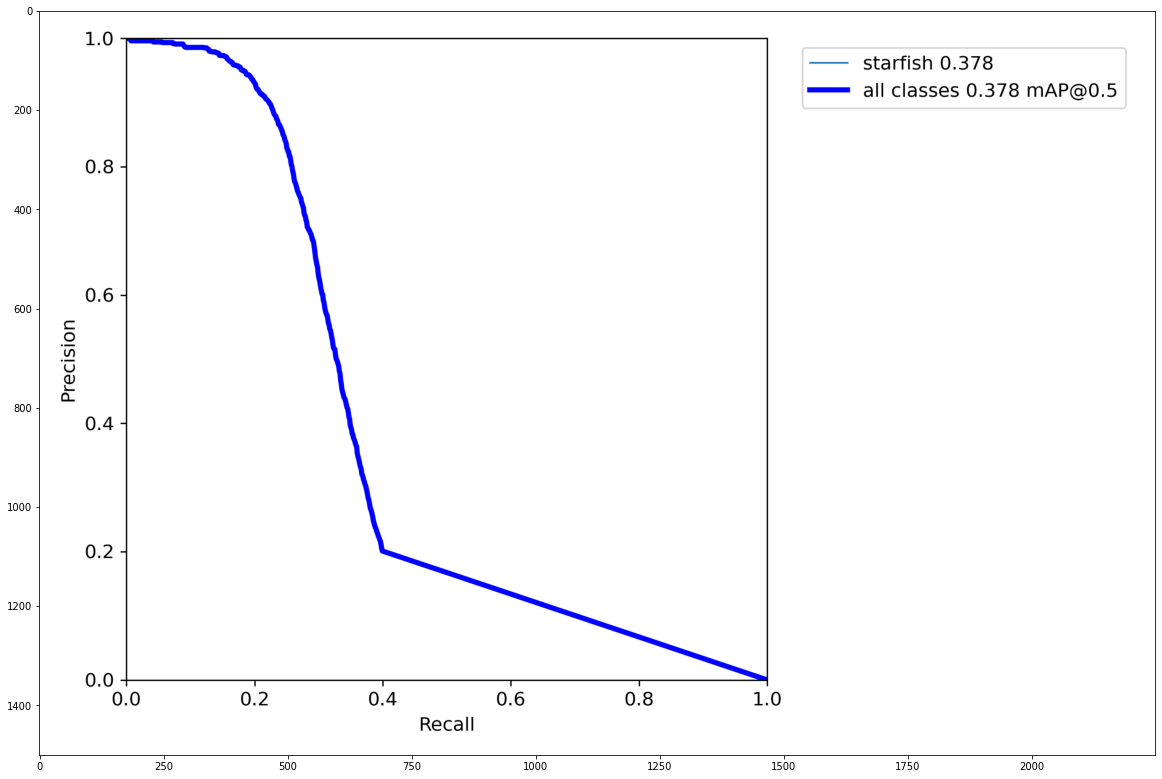

In [7]:
 show_image(read_image('./yolov5/runs/train/exp5/PR_curve.png'))

# Plotting recall curve

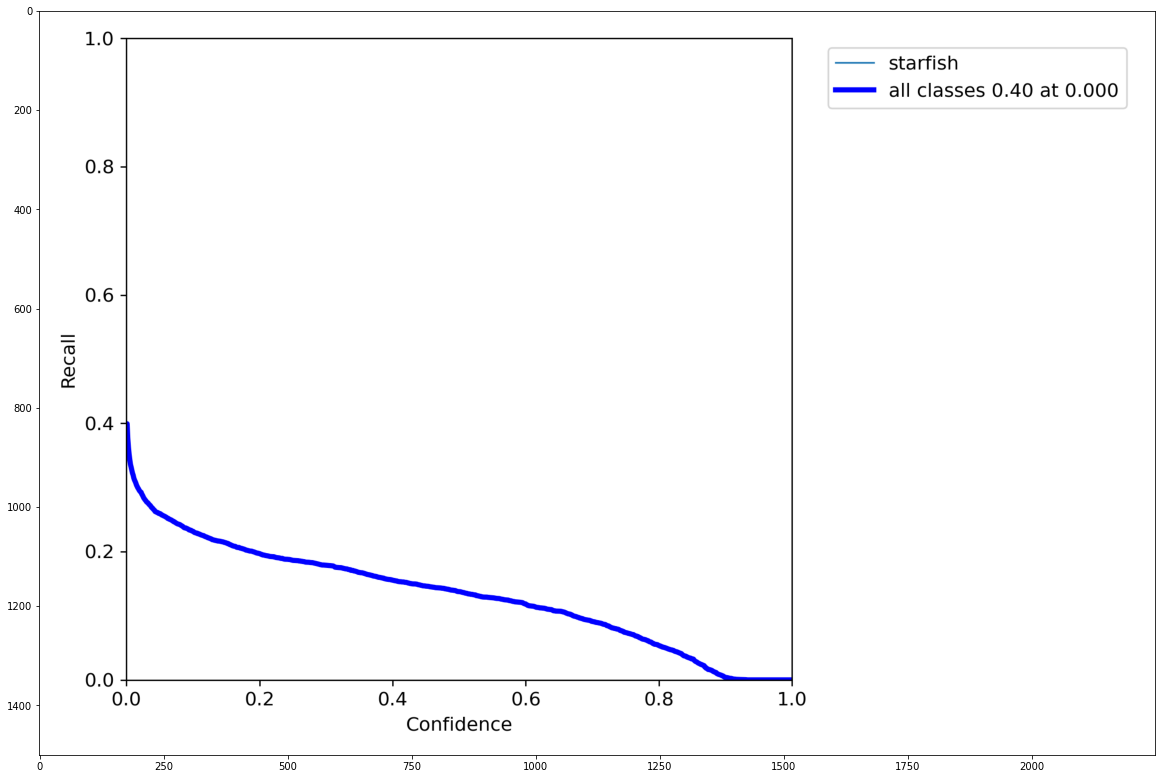

In [8]:
show_image(read_image('./yolov5/runs/train/exp5/R_curve.png'))

# Plotting precision curve

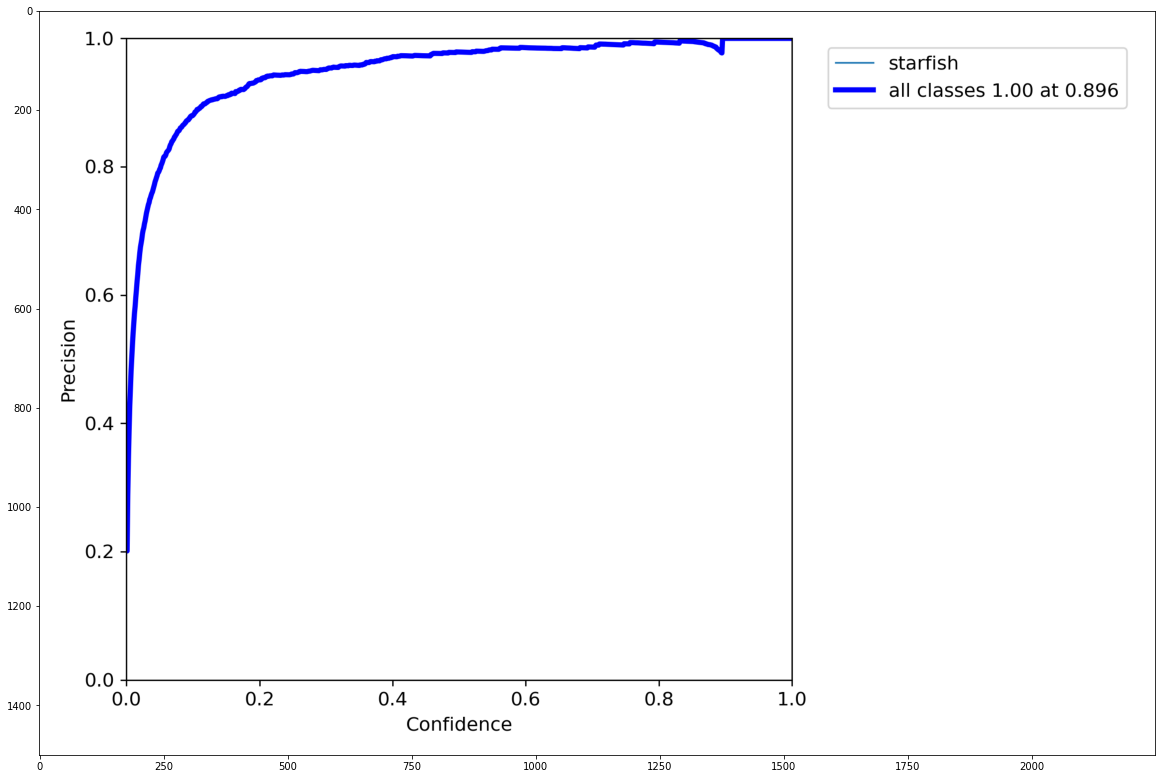

In [9]:
show_image(read_image('./yolov5/runs/train/exp5/P_curve.png'))

# Testing model at some IoUs (0.3, 0.55 and 0.8)

In [10]:
# Model weights
!cp ../input/7-great-barrier-reef-train-the-bigger-yolov5/yolov5/runs/train/exp5/weights/best.pt ./best.pt

!python ./yolov5/val.py --img 1280 --batch 16 --data GBR.yaml --weights best.pt --conf-thres 0.01 --iou-thres 0.3

val: data=/kaggle/working/yolov5/data/GBR.yaml, weights=['best.pt'], batch_size=16, imgsz=1280, conf_thres=0.01, iou_thres=0.3, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 280 layers, 12308200 parameters, 0 gradients
val: Scanning '/kaggle/working/datasets/validation.cache' images and labels... 2
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       8232       6384      0.684      0.292      0.475      0.255
Speed: 0.4ms pre-process, 9.1ms inference, 0.9ms NMS per image at shape (16, 3, 1280, 1280)
Results saved to yolov5/runs/val/exp


In [11]:
!python ./yolov5/val.py --img 1280 --batch 16 --data GBR.yaml --weights best.pt --conf-thres 0.01 --iou-thres 0.55

val: data=/kaggle/working/yolov5/data/GBR.yaml, weights=['best.pt'], batch_size=16, imgsz=1280, conf_thres=0.01, iou_thres=0.55, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 280 layers, 12308200 parameters, 0 gradients
val: Scanning '/kaggle/working/datasets/validation.cache' images and labels... 2
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       8232       6384      0.683      0.292      0.473      0.254
Speed: 0.5ms pre-process, 9.2ms inference, 0.9ms NMS per image at shape (16, 3, 1280, 1280)
Results saved to yolov5/runs/val/exp2


In [12]:
!python ./yolov5/val.py --img 1280 --batch 16 --data GBR.yaml --weights best.pt --conf-thres 0.01 --iou-thres 0.8

val: data=/kaggle/working/yolov5/data/GBR.yaml, weights=['best.pt'], batch_size=16, imgsz=1280, conf_thres=0.01, iou_thres=0.8, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-255-gca0a007 torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 280 layers, 12308200 parameters, 0 gradients
val: Scanning '/kaggle/working/datasets/validation.cache' images and labels... 2
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       8232       6384       0.67      0.273      0.413      0.218
Speed: 0.4ms pre-process, 9.2ms inference, 1.0ms NMS per image at shape (16, 3, 1280, 1280)
Results saved to yolov5/runs/val/exp3
